In [4]:
#pip install control

In [9]:
#bibliotecas para o projeto
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#criando a funçao de transferencia em malha aberta

#variaveis de constante da mola, massa e constante de amortecimento
km = 1.6; massa = 0.1; fv = 0.2

#valores de wn e eta
wn = np.sqrt(km/massa); eta = (fv/massa)/(2*wn) 
print('Wn e eta = ', [wn, eta])

#vetores que serao os polinomios para a funçao de transferencia
Tsim = 10 #vetor de tempo de simulaçao
numerador = [1.]; denominador = [massa, fv, km] #"1/tau", "1/tau + s"
print("{}, {}, {}".format(Tsim, numerador, denominador))

#usa os vetores para criar a funçao de transferencia em MA e imprimi ela
P_s = ctl.tf(numerador, denominador)
print('FT malha aberta:', P_s)

Wn e eta =  [4.0, 0.25]
10, [1.0], [0.1, 0.2, 1.6]
FT malha aberta: 
          1
---------------------
0.1 s^2 + 0.2 s + 1.6



In [10]:
#parametros da funçao de transferencia do controlador PID
ki = 2*wn; kp = 10*wn; kd = 1*wn

#cria a funçao do PID a partir dos polinomios
C_s = ctl.tf([kd, kp, ki], [1., 0.]) 
print('FT controlador:', C_s)

#funçao transferencia sensor unitario
H_s = ctl.tf([1.], [1.])
print('FT sensor:', H_s)

#funçao de transferencia da malha fechada MF
#G1_s = (C_s*P_s)/(1+C_s*P_s*H_s)
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s, H_s, sign=-1)
print('\nFT malha fechada', G1_s)

FT controlador: 
4 s^2 + 40 s + 8
----------------
       s

FT sensor: 
1
-
1


FT malha fechada 
       4 s^2 + 40 s + 8
------------------------------
0.1 s^3 + 4.2 s^2 + 41.6 s + 8



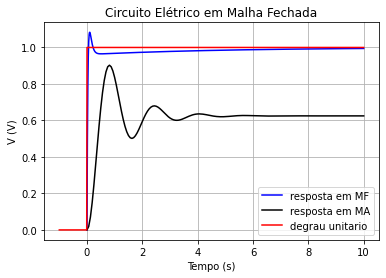

In [12]:
#calcula a resposta ao degrau em MA e MF
T, yout = ctl.step_response(P_s, Tsim)
T_mf, yout_mf = ctl.step_response(G1_s, Tsim) # retorna dois valores a partir dos parametros de funçao de transferencia e tempo
plt.plot(T_mf, yout_mf, 'b-')
plt.plot(T, yout, 'k-')

#calcula um degrau unitario
T2 = np.linspace(-1, Tsim, 1000) #cria um vetor de -0.2 ate Tsim com 1000 pontos entre eles
degrau = np.ones_like(T2)
degrau[T2<0] = 0
plt.plot(T2, degrau, 'r-')

#melhorando o grafico com titulo, nomes para os eixos e legenda
plt.title("Circuito Elétrico em Malha Fechada")
plt.ylabel('V (V)'); plt.xlabel('Tempo (s)')
plt.legend(['resposta em MF', 'resposta em MA', 'degrau unitario'])
plt.grid()